# LAMA Group

## Exercise 1

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [135]:
data = np.loadtxt('cluster.dat')

In [136]:
data.shape

(2, 500)

Text(0, 0.5, 'X_2')

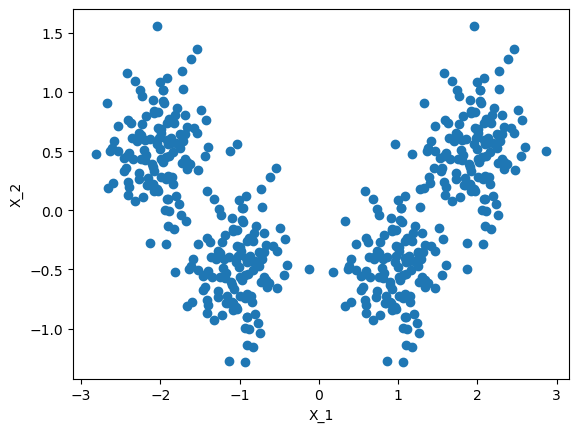

In [137]:
plt.scatter(data[0], data[1])
plt.xlabel("X_1")
plt.ylabel('X_2')

In [138]:
mean = np.mean(data)
mean

-0.0015017629999999986

In [139]:
def create_prototypes(num):
  prototypes = [[random.uniform(mean - 1, mean + 1), random.uniform(mean - 1, mean + 1)] for x in range(num)]
  return prototypes

In [140]:
def calc_error(prototypes,ms):
    dist = np.array([np.linalg.norm(data - i.reshape(2,1), axis=0) for i in prototypes])
    error = dist[np.array(ms).astype(bool)].sum()/500
    return error

In [141]:
def k_means_step(data, num, prototypes):

  assignment = []
  for i in range(500):
    min_dist = 100
    closest = 0
    for j in range(len(prototypes)):
      dist = np.linalg.norm(data.T[i] - prototypes[j])
      if dist < min_dist:
        min_dist = dist
        closest = j
    assignment.append(closest)

  new_prototypes = []
  ms = []
  m = np.zeros(500)
  for k in range(len(prototypes)):
    m[np.where(np.array(assignment) == k)] = 1
    cluster = [[data[0][index], data[1][index]] for index in np.where(np.array(assignment) == k)]
    center = [sum(cluster[0][0]/len(cluster[0][0])), sum(cluster[0][1]/len(cluster[0][1]))]
    new_prototypes.append(center)
    ms.append(m)
    m = np.zeros(500)
  return new_prototypes, ms, assignment

In [142]:
def k_means(data, num, num_iter):
  prototypes = create_prototypes(num)
  updates = [prototypes]
  errors = []
  assignments = []
  for i in range(num_iter):
    new_prototypes, ms, assignment = k_means_step(data, num, prototypes)
    prototypes = new_prototypes
    updates.append(prototypes)
    error = calc_error(np.array(prototypes), ms)
    errors.append(error)
    assignments.append(assignment)
  return prototypes, updates, errors, assignments

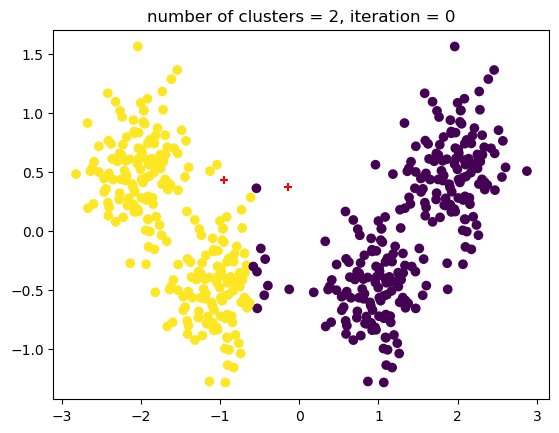

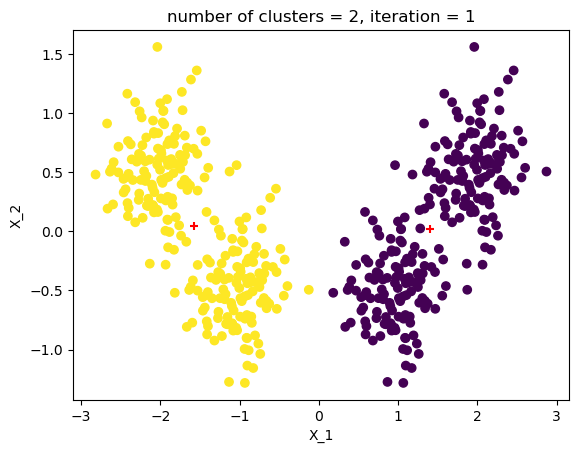

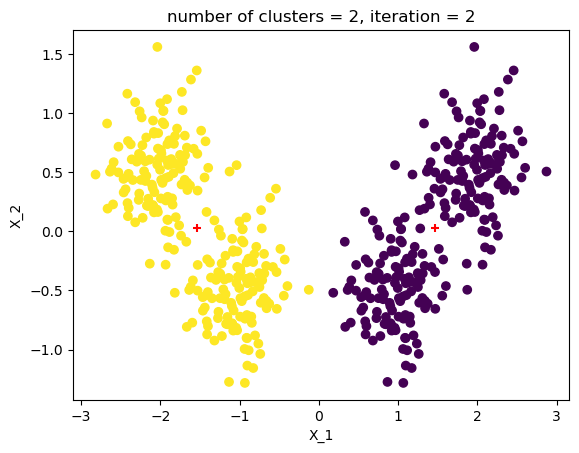

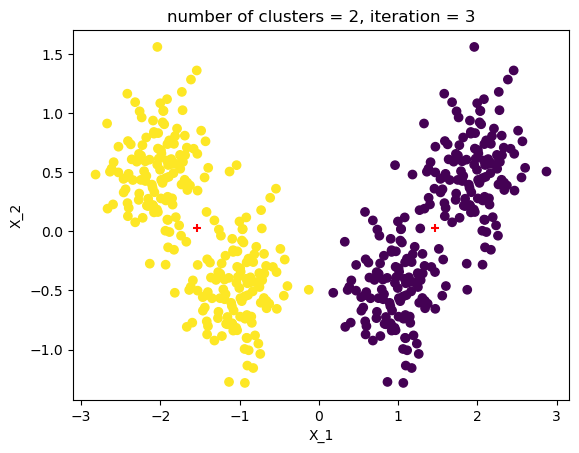

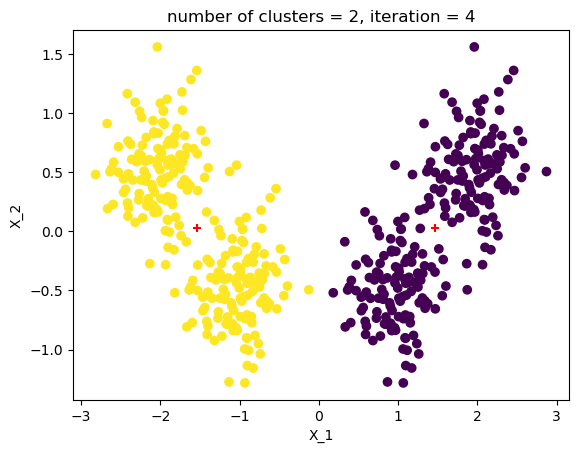

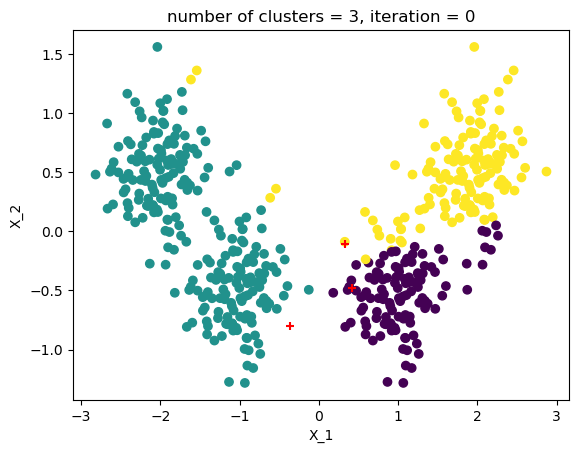

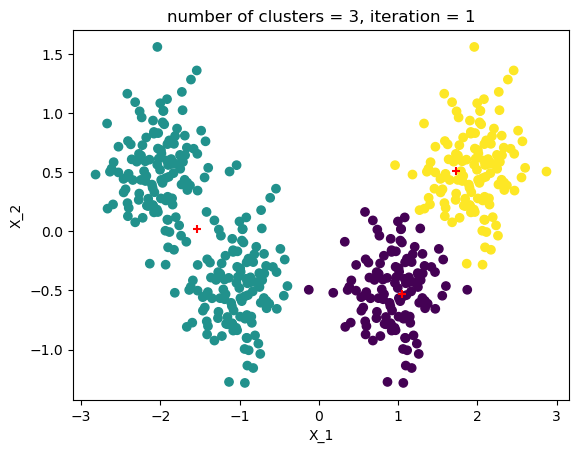

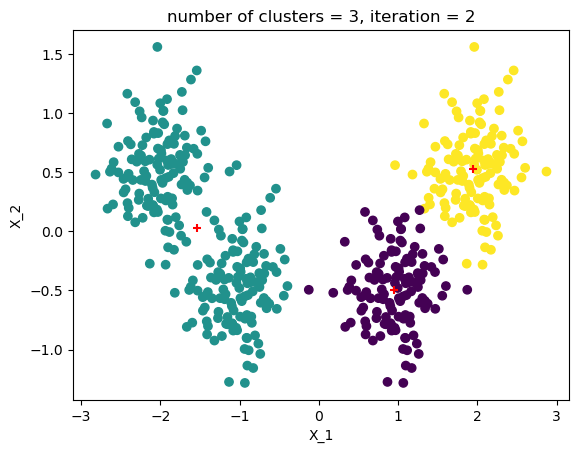

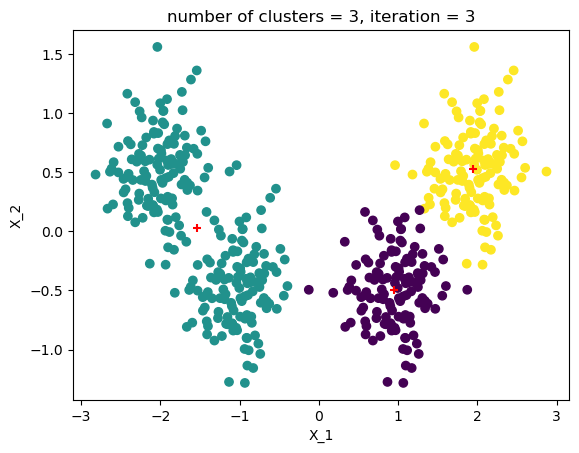

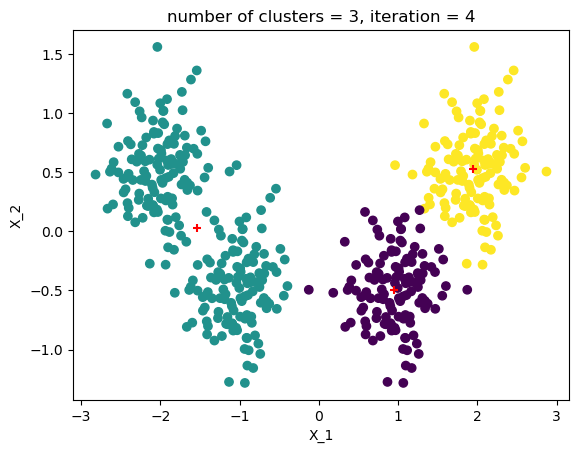

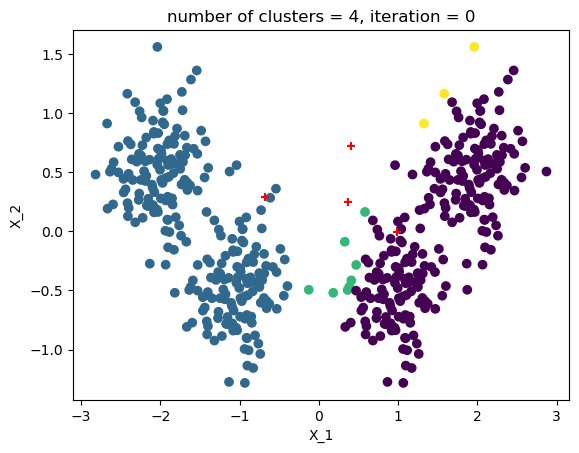

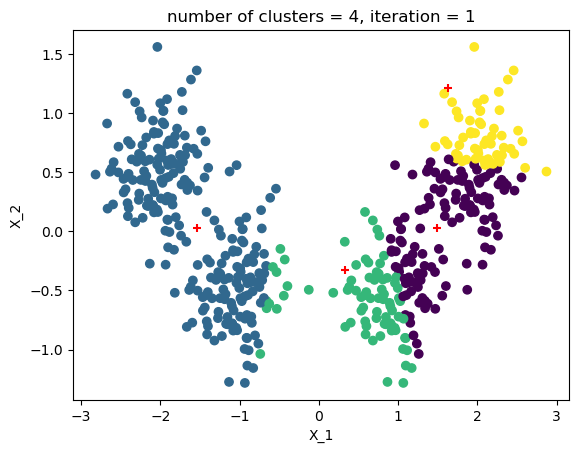

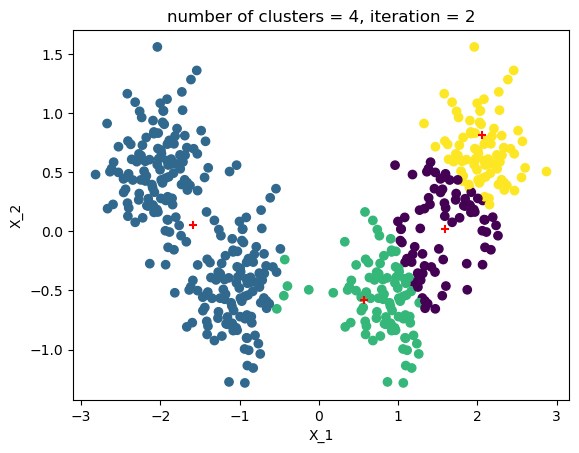

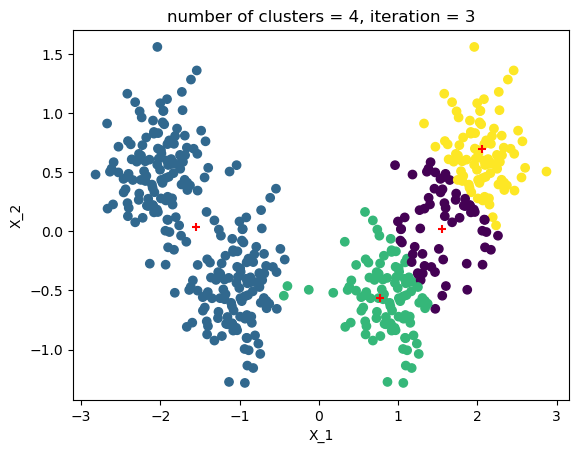

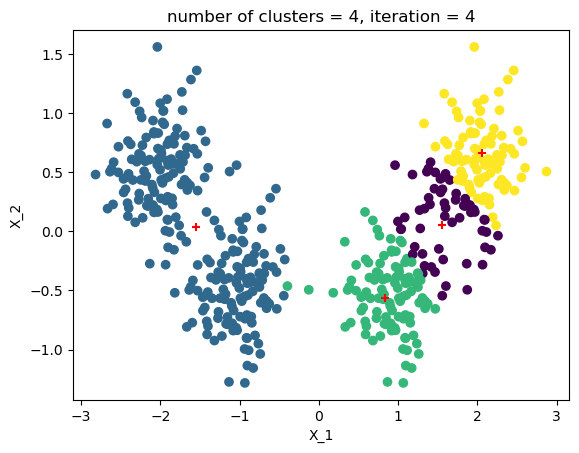

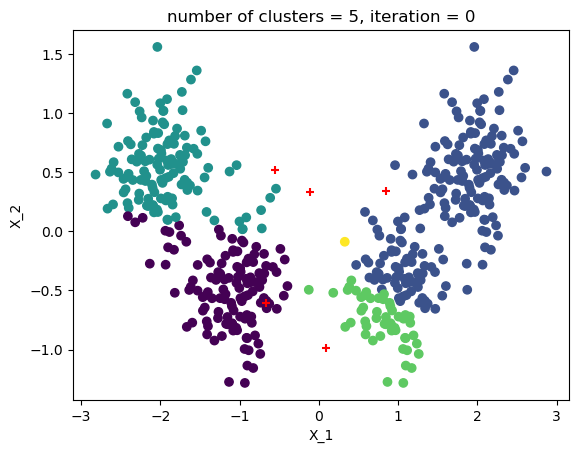

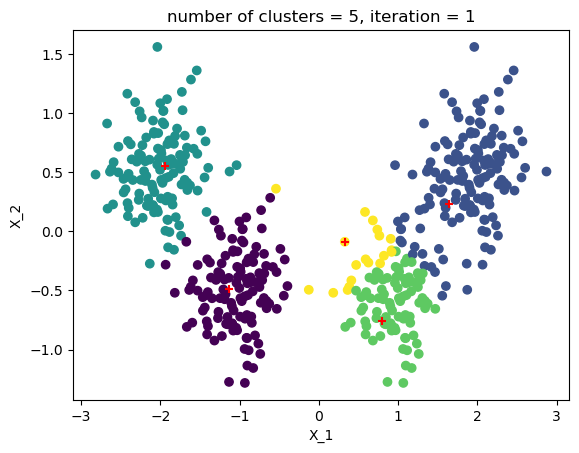

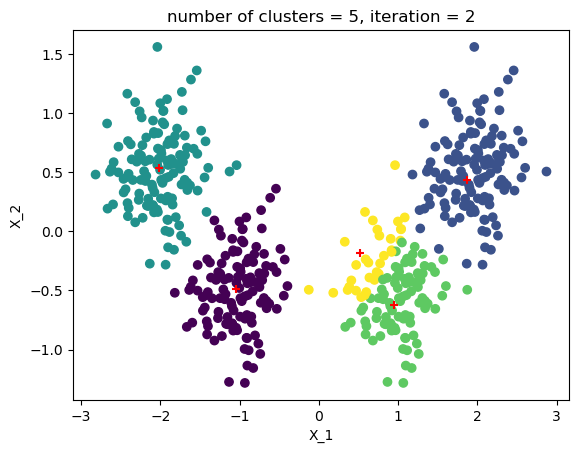

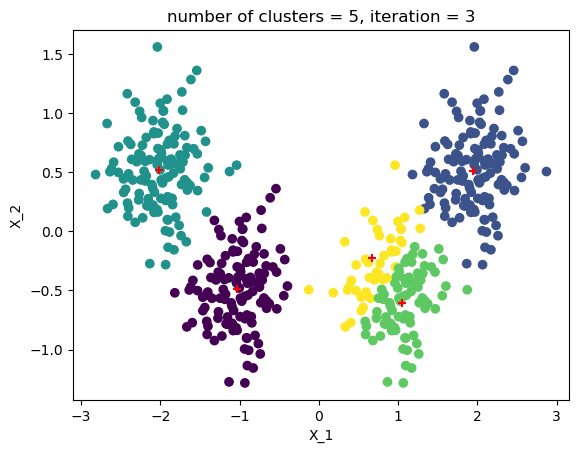

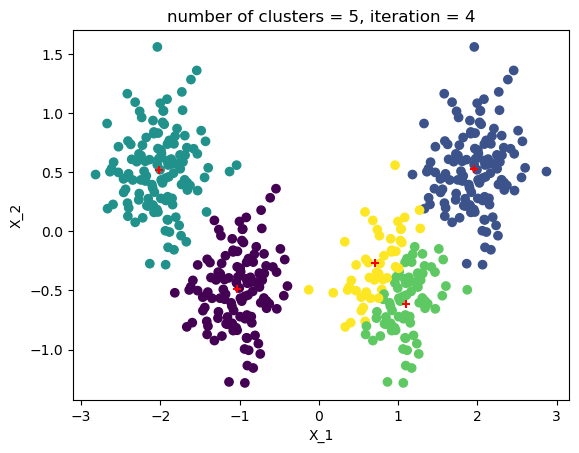

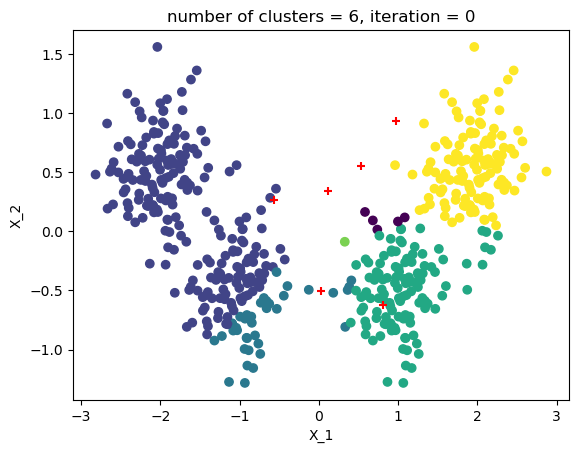

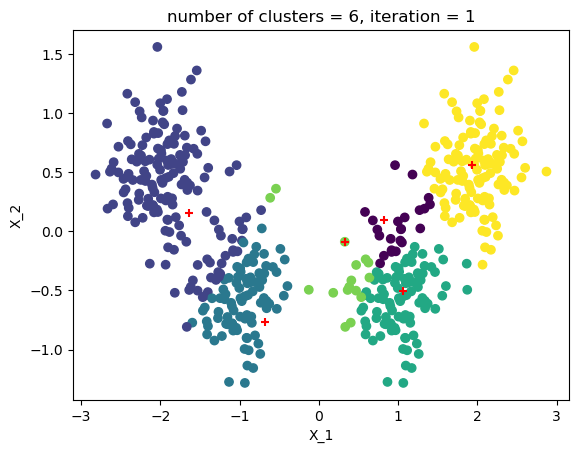

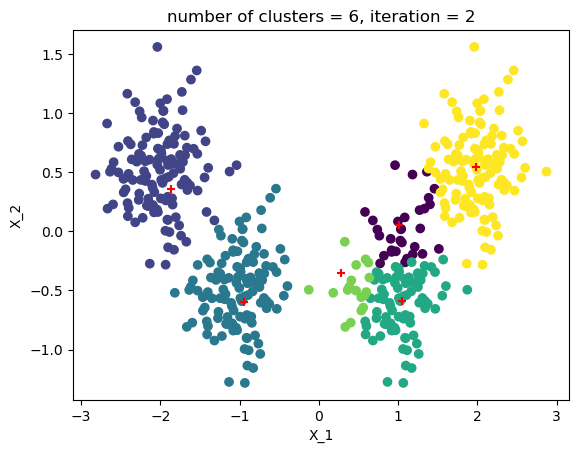

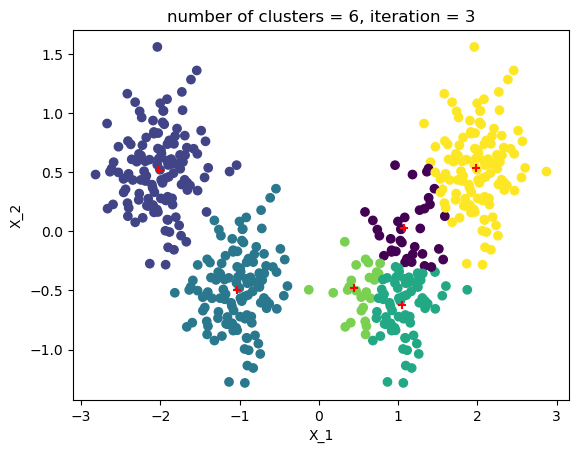

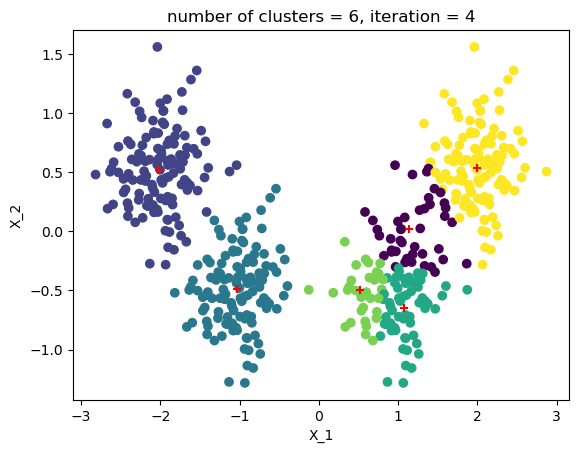

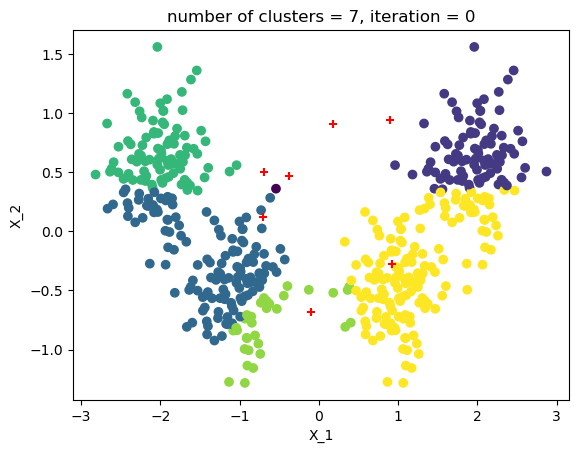

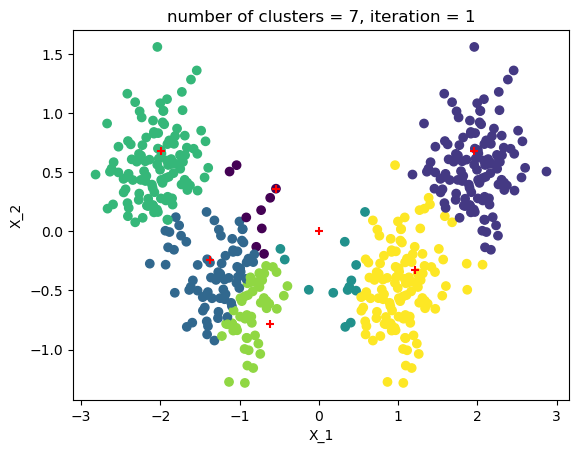

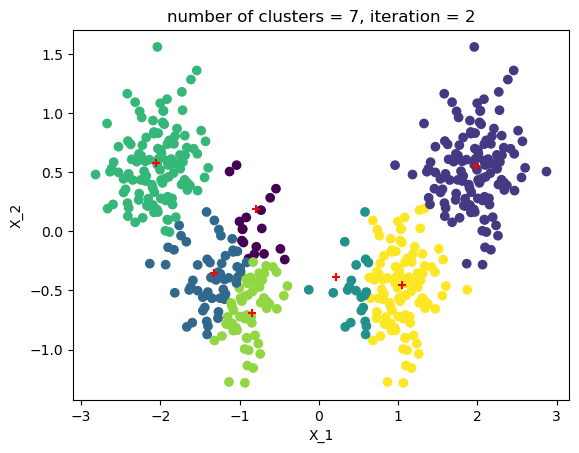

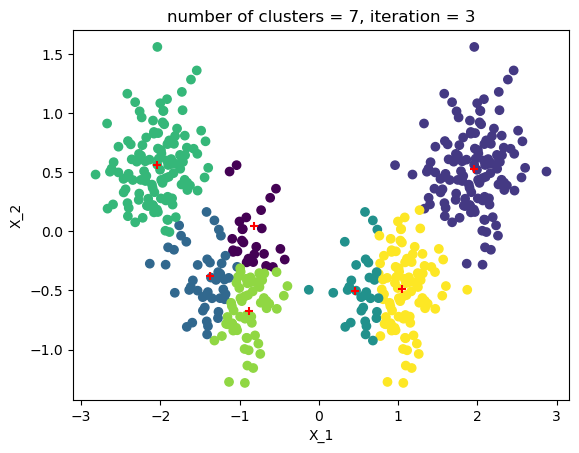

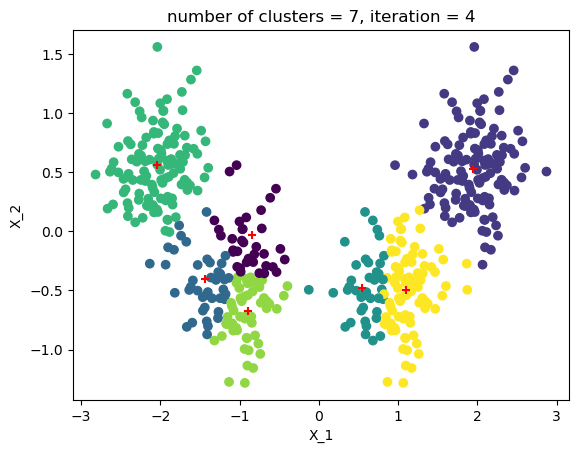

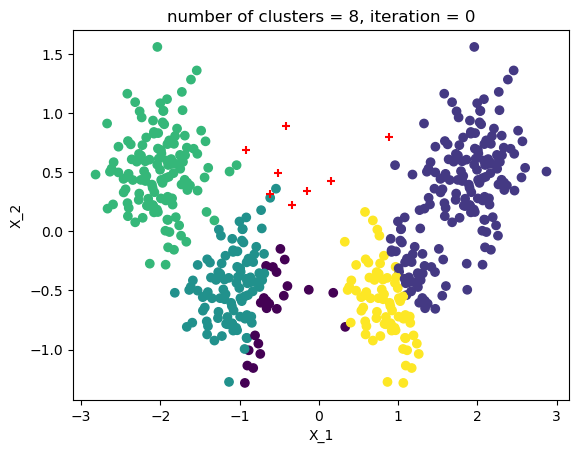

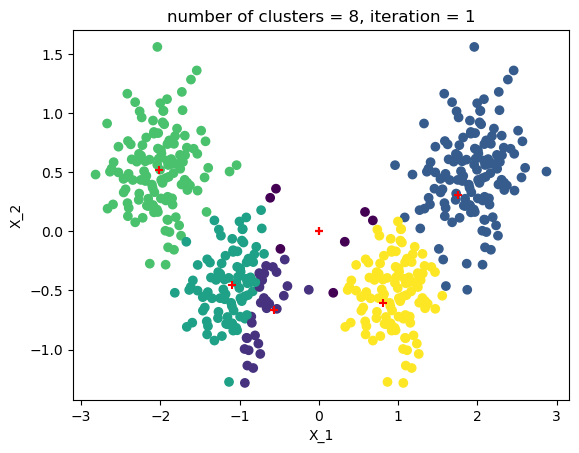

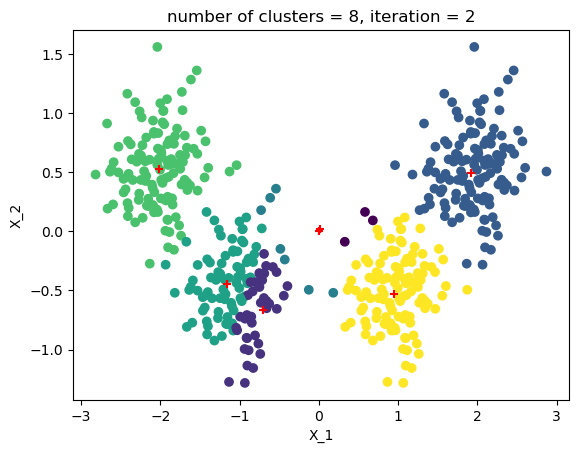

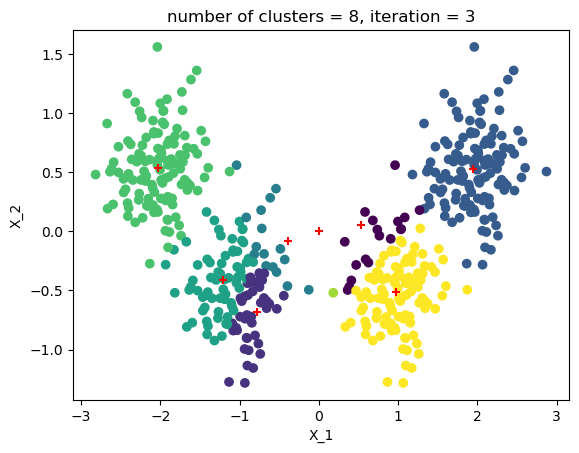

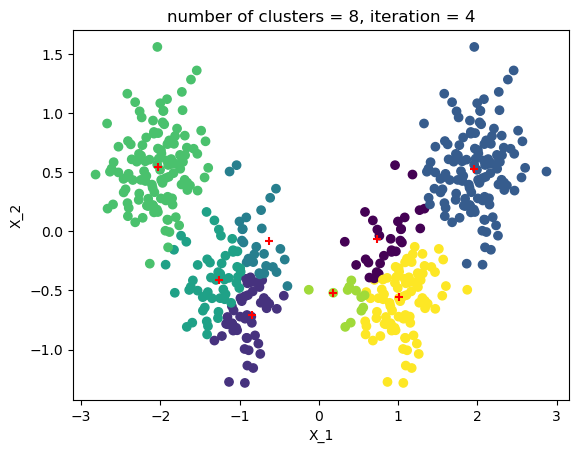

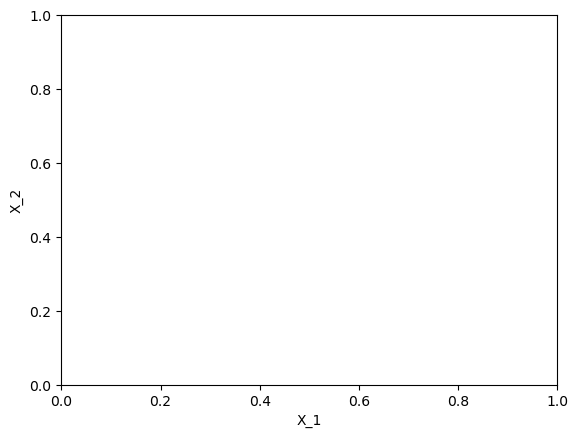

In [143]:
num_clust = [2,3,4,5,6,7,8]

for j in num_clust:
  centroids, updates, errors, assignment = k_means(data, j, 5)
  for i in range(5):
    plt.scatter(data[0], data[1], c = assignment[i])
    plt.scatter(np.array(updates[i]).T[0],np.array(updates[i]).T[1], marker = '+', color='red')
    plt.title(f'number of clusters = {j}, iteration = {i}')
    plt.show()
    plt.xlabel("X_1")
    plt.ylabel('X_2')

In [144]:
def create_prototypes2(num):
  prototypes = [[random.uniform(mean - 2, mean + 2), random.uniform(mean - 2, mean + 2)] for x in range(num)]
  return prototypes

def k_means2(data, num, num_iter):
  prototypes = create_prototypes2(num)
  updates = [prototypes]
  errors = []
  assignments = []
  for i in range(num_iter):
    new_prototypes, ms, assignment = k_means_step(data, num, prototypes)
    prototypes = new_prototypes
    updates.append(prototypes)
    error = calc_error(np.array(prototypes), ms)
    #print(error)
    errors.append(error)
    assignments.append(assignment)
  return prototypes, updates, errors, assignments

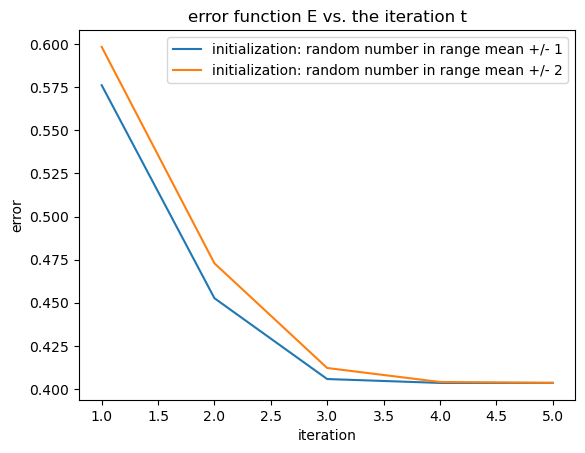

In [145]:
centroids_1, updates_1, errors_1, assignment_1 = k_means(data, 4, 5)
centroids_2, updates_2, errors_2, assignment_2 = k_means2(data, 4, 5)

plt.plot([1,2,3,4,5],errors_1, label = 'initialization: random number in range mean +/- 1')
plt.plot([1,2,3,4,5],errors_2, label = 'initialization: random number in range mean +/- 2')
plt.legend()
plt.title('error function E vs. the iteration t')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

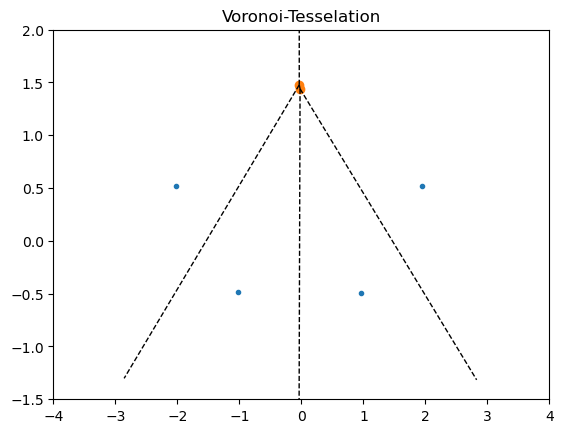

Text(0, 0.5, 'X_2')

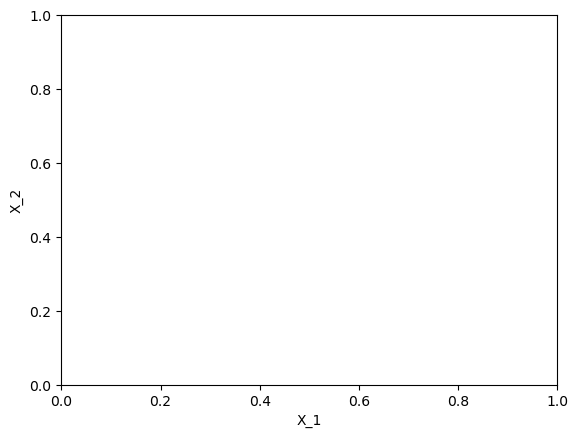

In [146]:
from scipy.spatial import Voronoi, voronoi_plot_2d

centroids, updates, errors, assignment = k_means(data, 4, 5)

vor = Voronoi(centroids)

fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
ax.set_xlim([-4, 4])
ax.set_ylim([-1.5, 2])
ax.set_title('Voronoi-Tesselation')
plt.xlabel("X_1")
plt.ylabel('X_2')
plt.show()


## Exercise 2

In [147]:
#Initialization

data = np.genfromtxt('cluster.dat')
data = data.T
epsilon = 0.1
tau = 3
tmax = data.shape[0]
M = 4


def set_proto(data, M):
  return np.mean(data) + np.random.random_sample([M, data.shape[1]])



Final prototypes:
[[ 0.49868902  0.84837767]
 [ 1.91389358  0.57116462]
 [-1.54843013 -0.19551449]
 [ 0.99427201 -0.5661288 ]]


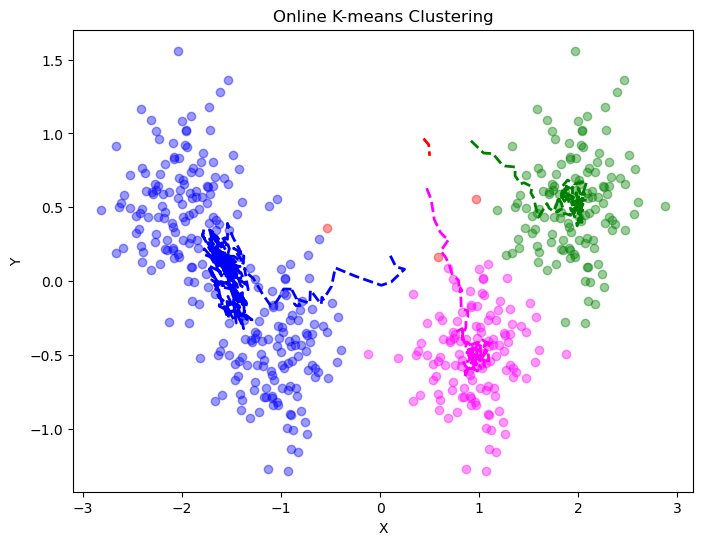

In [148]:
#Optimization



def update(proto, p, e):
    closest_prototype = np.argmin([np.linalg.norm(p - prototype) for prototype in proto])
    proto[closest_prototype] += e * (p - proto[closest_prototype])
    return proto

def compute_error(data, proto):
    error = 0
    for p in data:
        distances = np.linalg.norm(p - proto, axis=1)
        closest_prototype_index = np.argmin(distances)
        error += np.sum((p - proto[closest_prototype_index]) ** 2)
    return error

def online_kmeans(data, M, epsilon, tmax, tau):
    proto = set_proto(data, M)
    errors = []
    prototypes_history = [proto.copy()]

    for t in range(tmax):
        proto = update(proto, data[t], epsilon)

        if t >= tmax / 4:
            epsilon *= tau
        prototypes_history.append(proto.copy())
        error = compute_error(data, proto)
        errors.append(error)


    return proto, prototypes_history, errors



prototypes, prototypes_history, error = online_kmeans(data, M, epsilon, tmax, 1)
print("Final prototypes:")
print(prototypes)


# Visualization
colors = ['r', 'g', 'b', 'magenta']
line_colors = ['r', 'g', 'b', 'magenta']
num_clusters = 4


plt.figure(figsize=(8, 6))
for i, point in enumerate(data):
    closest_prototype = np.argmin([np.linalg.norm(point- prototype) for prototype in prototypes])
    plt.scatter(point[0], point[1], color=colors[closest_prototype], alpha = 0.4)

# Plotting the prototype lines
for i in range(num_clusters):
    x = [p[i][0] for p in prototypes_history]
    y = [p[i][1] for p in prototypes_history]
    plt.plot(x, y, color=line_colors[i], linewidth=2, linestyle='--')

plt.title("Online K-means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


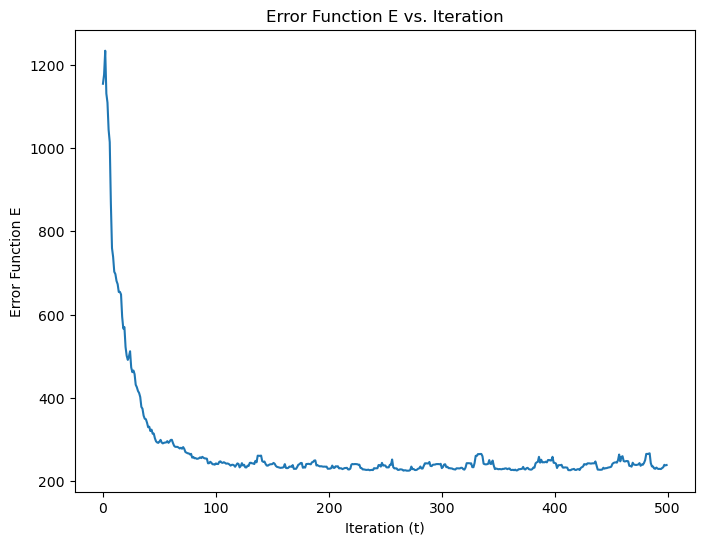

In [149]:
plt.figure(figsize=(8, 6))
plt.plot(range(tmax), error)
plt.title("Error Function E vs. Iteration")
plt.xlabel("Iteration (t)")
plt.ylabel("Error Function E")
plt.show()

The clustering happens but not always exactly like we want it to, it depends a lot on the random initilial

# Exercise 3

## (a)

In [203]:
data = np.loadtxt('cluster.dat') # read the data 2* 500
mean = np.mean(data,axis=1) # mean across data points
M =12 # number of clusters
convergance_tolerance = 0.1 # quite high tolerance for our data?, but necessary to reduce run time for part C.

Text(0, 0.5, 'X_2')

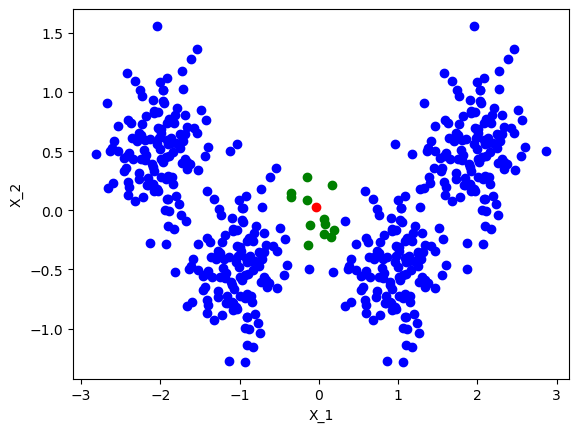

In [204]:
def create_prototypes(M, mean):
  prototypes = np.random.uniform(-1,1,(M,2))/3 + mean
  return prototypes

init_prototypes = create_prototypes(M,mean) 

plt.scatter(data[0,:], data[1,:], color = 'b')
plt.scatter(mean[0],mean[1],color='r')
plt.scatter(init_prototypes[:,0],init_prototypes[:,1], color = 'g')
plt.xlabel("X_1")
plt.ylabel('X_2')

## (b)

In [205]:
def run_step_k_means(previous_prototypes,new_prototypes,data,beta):
    
    soft_assignment = np.zeros((data.shape[1],previous_prototypes.shape[0],data.shape[0])) # 500 * 12 * 2 according to tutorial notes, but why?

    # step 1: assign points to clusters
    for idx, prototype in enumerate(previous_prototypes):
        for alpha,point in enumerate(data.T):
            num = np.exp(-beta*0.5 * (point-prototype)**2)
            denum = 0
            for val in previous_prototypes:
                denum += np.exp(-beta*0.5 *(point-val)**2)
            
            soft_assignment[alpha,idx,:] = num/denum

    # step 2: Update centroids
    for idx in range(previous_prototypes.shape[0]):
        new_prototypes[idx,:] =  np.sum((data.T * soft_assignment[:, idx, :]), axis = 0)/np.sum(soft_assignment[:, idx, :], axis = 0)
    return new_prototypes, previous_prototypes


In [206]:
converged_prototypes = []
for beta in np.arange(0.2,20+0.2,0.2): # for every fixed beta
    previous_prototypes = np.copy(init_prototypes) # use the same initialization
    new_prototypes = np.zeros_like(previous_prototypes)
    while (np.linalg.norm((new_prototypes - previous_prototypes), axis = 1) > convergance_tolerance).any(): # if any has not converged (if any is True), continue
        new_prototypes, previous_prototypes = run_step_k_means(previous_prototypes,new_prototypes, data, beta) # get the new centroids
        # swap them, so that in next loop we get the newer ones
        temp = np.copy(previous_prototypes)
        previous_prototypes = np.copy(new_prototypes)
        new_prototypes = np.copy(temp)

    converged_prototypes.append(new_prototypes) 

## (c)

Text(0, 0.5, 'X_2')

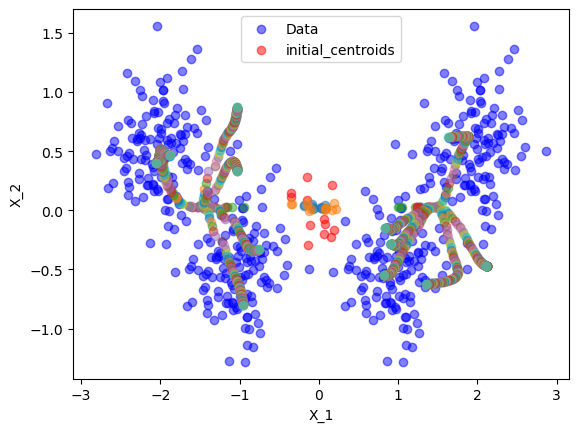

In [207]:
beta = np.arange(0.2,20+0.2,0.2)
plt.scatter(data[0,:],data[1,:] , color = 'b', label = 'Data',alpha = 0.5)
plt.scatter(init_prototypes[:,0],init_prototypes[:,1] , color = 'r', label = 'initial_centroids', alpha = 0.5)
for idx,final_values in enumerate(converged_prototypes):
    plt.scatter(final_values[:,0],final_values[:,1],alpha = 0.5)
plt.legend()
plt.xlabel("X_1")
plt.ylabel('X_2')

## (d)

In [208]:
# annealing schedule
beta = 0.2
tau = 1.1
converged_prototypes_schedule = []
while beta<10:
    previous_prototypes = np.copy(init_prototypes) # use the same initialization
    new_prototypes = np.zeros_like(previous_prototypes)
    while (np.linalg.norm((new_prototypes - previous_prototypes), axis = 1) > convergance_tolerance).any(): # if any has not converged (if any is True), continue
        new_prototypes, previous_prototypes = run_step_k_means(previous_prototypes,new_prototypes, data, beta) # get the new centroids
        # swap them, so that in next loop we get the newer ones
        temp = np.copy(previous_prototypes)
        previous_prototypes = np.copy(new_prototypes)
        new_prototypes = np.copy(temp)
    beta = beta * tau
    converged_prototypes_schedule.append(previous_prototypes)

Text(0, 0.5, 'X_2')

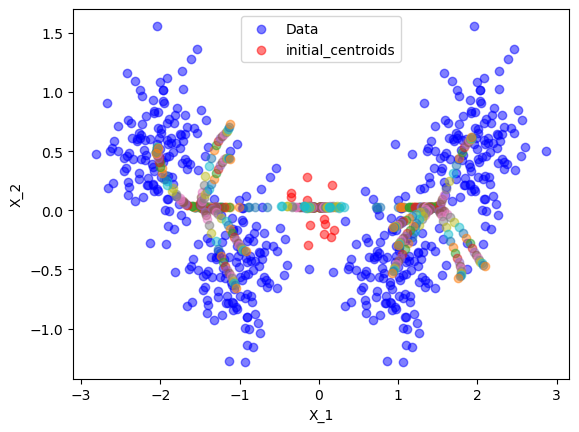

In [209]:
plt.scatter(data[0,:],data[1,:] , color = 'b', label = 'Data', alpha = 0.5)
plt.scatter(init_prototypes[:,0],init_prototypes[:,1] , color = 'r', label = 'initial_centroids',alpha = 0.5)
for idx,final_values in enumerate(converged_prototypes_schedule):
    plt.scatter(final_values[:,0],final_values[:,1],alpha = 0.5)
plt.legend()
plt.xlabel("X_1")
plt.ylabel('X_2')

## (e)

Text(0, 0.5, 'X_2')

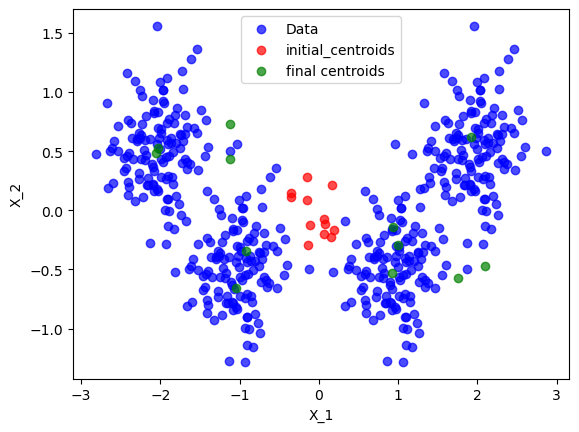

In [210]:
plt.scatter(data[0,:],data[1,:] , color = 'b', label = 'Data',alpha = 0.7)
plt.scatter(init_prototypes[:,0],init_prototypes[:,1] , color = 'r', label = 'initial_centroids',alpha = 0.7)
plt.scatter(converged_prototypes_schedule[-1][:,0],converged_prototypes_schedule[-1][:,1],alpha = 0.7, color = 'g', label = 'final centroids')
plt.legend()
plt.xlabel("X_1")
plt.ylabel('X_2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


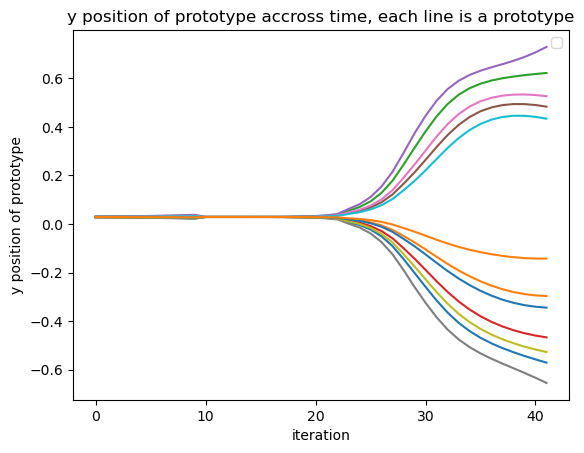

In [211]:
arr = np.array(converged_prototypes_schedule)
for i in range(M):
    plt.plot(range(len(converged_prototypes_schedule)),arr[:,i,1],)
plt.xlabel("iteration")
plt.ylabel('y position of prototype')
plt.title('y position of prototype accross time, each line is a prototype')
plt.legend()

The plot is super fishy at the early stages.... but eventually we can see that the curves have high slopes (centroids moving fast) , then lower slopes (are converging slowly)

### checking the X_1 values as well out of curiousity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


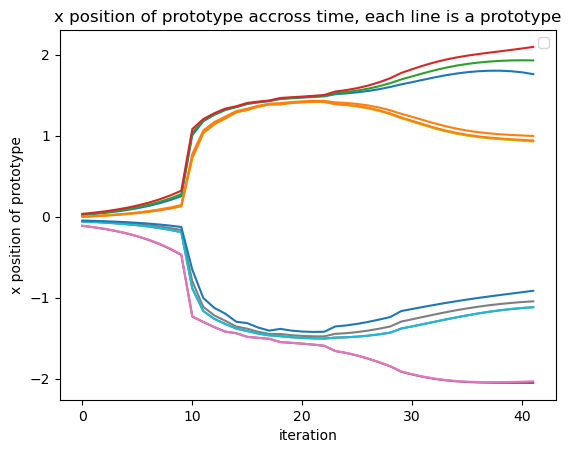

In [212]:
arr = np.array(converged_prototypes_schedule)
for i in range(M):
    plt.plot(range(len(converged_prototypes_schedule)),arr[:,i,0],)
plt.xlabel("iteration")
plt.ylabel('x position of prototype')
plt.title('x position of prototype accross time, each line is a prototype')
plt.legend()